
# Стохастические бандиты
Домашняя работа №1
Дедлайн: 5 октября 21-00


**Задание 1** (Doubling trick): Рассмотрите произвольный алгоритм $\mathcal A$ для фиксированного временного горизонта $T$. Постройте на его основе алгоритм $\mathcal{A}_{\infty}$, который работает бесконечно по следующему правилу: для фазы $i$  ($i=1, 2, \dots$) число раундов составляет $2^i$. В каждую фазу алгоритм $\mathcal A$ запускается вновь с временным горизонтом $T=2^i$.



Сформулируйте и докажите теорему, которая переводит верхнюю оценку на регрет (не зависящую от инстанса) для алгоритма $\mathcal A$ в верхнюю оценку на регрет для $\mathcal{A}_{\infty}$.


__Proof.__ Consider a sequence $(T_i)_{i \in \mathbb{N}}$ such that $T_{i} \leqslant T_{i+1}, T_{-1} = 0$ and $\lim \limits_{i \rightarrow +\infty} T_i = + \infty.$ Also define the next variable 
$$
L(T) := \min \{i \in \mathbb{N} : T_i > T \}, ~ \forall T \geqslant 1.
$$
Let $X_k(t)$ be a reward from $k$-th arm at the round $t$ and $A(t)$ be an arm which was chosen at round $t.$
Denote
$$
X^*(t) = \max (X_1(t), \ldots, X_K(t)).
$$
For every $k \in \{ 1, \ldots, K \}$ we have
$$
\mathbb{E} \left[ \sum \limits_{t=1}^T (X^*(t) - X_{A^{\infty}(t)}(t)) \right] = \sum \limits_{i=0}^{L(T) - 1} \mathbb{E} \left[ \sum \limits_{t=T_{i-1}}^{T_i} (X^*(t) - X_{A(t)}(t)) \right] + \mathbb{E} \left[ \sum \limits_{t=T_{L(T) - 1}}^{T} (X^*(t) - X_{A(t)}(t)) \right] = \\
= \sum \limits_{i=0}^{L(T) - 1} \mathbb{E} \left[ \sum \limits_{t=T_{i-1}}^{T_i} (X^*(t) - X_{A(t)}(t)) \right] + \mathbb{E} \left[ \sum \limits_{t=T_{L(T) - 1}}^{T} (X^*(t) - X_{A(t)}(t)) \right].
$$
Note the next thing: $R(t) \leqslant R(s), \forall t \leqslant s.$ Thus, 
$$
\mathbb{E} \left[ \sum \limits_{t=T_{L(T) - 1}}^{T} (X^*(t) - X_{A(t)}(t)) \right] \leqslant \mathbb{E} \left[ \sum \limits_{t=T_{L(T) - 1}}^{T_{L(T)}} (X^*(t) - X_{A(t)}(t)) \right].
$$
Finally, we have
$$
\mathbb{E} \left[ \sum \limits_{t=1}^T (X^*(t) - X_{A^{\infty}(t)}(t)) \right] \leqslant  \sum \limits_{i=0}^{L(T) - 1} \mathbb{E} \left[ \sum \limits_{t=T_{i-1}}^{T_i} (X^*(t) - X_{A(t)}(t)) \right] + \mathbb{E} \left[ \sum \limits_{t=T_{L(T) - 1}}^{T_{L(T)}} (X^*(t) - X_{A(t)}(t)) \right] = \\
= \sum \limits_{i=0}^{L(T)} \mathbb{E} \left[ \sum \limits_{t=T_{i-1}}^{T_i} (X^*(t) - X_{A(t)}(t)) \right].
$$
If we denote
$$
R_{A}(T_i, T_{i-1}) = \mathbb{E} \left[ \sum \limits_{t=1}^T (X^*(t) - X_{A(t)}(t)) \right]
$$
then
$$
R_{A^{\infty}}(T, 1) \leqslant \sum \limits_{i=0}^{L(T)} R_{A}(T_i, T_{i-1}).
$$

**Задание 2**

Реализуйте класс стохастических бандитов с бернулиевским распределением выигрышей. 


In [4]:
import numpy as np
import seaborn as sns
sns.set_theme()


class BernoulliBandit:
    #принимает на вход список из K>=2 чисел из [0,1]
    def __init__(self, bandit_probs):
        self.bandit_probs = np.array(bandit_probs)

    #Функция возвращает число ручек
    def K(self):
        return len(self.bandit_probs)

    #Принимает параметр 0 <= a <= K-1 и возвращает реализацию случайной величины 
    #X c P[X=1] равной среднему значению выигрыша ручки a+1
    def pull(self, a):
        if isinstance(a, (int, np.int64)):
            return 1 * (np.random.rand() < self.bandit_probs[a])
        else:
            return 1 * (np.random.rand(len(a)) < self.bandit_probs[a])

    #Возвращает текущее значение регрета
    def regret(self, a):
        return np.max(self.bandit_probs) - self.bandit_probs[a]

In [5]:
import matplotlib.pyplot as plt

def plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax):
    ax[0, 0].plot(time_range, mean_regret1, color="purple")
    ax[0, 0].scatter(time_range, mean_regret1, color="purple", s=2**5)
    ax[0, 1].hist(regret1, color="purple", edgecolor='white', linewidth=1)
    ax[0, 1].set_title("Histogram of regret (T = 1000)", fontsize=20)
    ax[0, 1].set_xlabel("Regret", fontsize=20)
    ax[1, 0].plot(time_range, mean_regret2, color="purple")
    ax[1, 0].scatter(time_range, mean_regret2, color="purple", s=2**5)
    ax[1, 1].hist(regret2, color="purple", edgecolor='white', linewidth=1)
    ax[1, 1].set_title("Histogram of regret (T = 1000)", fontsize=20)
    ax[1, 1].set_xlabel("Regret", fontsize=20)

    ax[0, 0].set_title("Params = {}".format(np.round(params1, 3)), fontsize=20)
    ax[1, 0].set_title("Params = {}".format(np.round(params2, 3)), fontsize=20)
    ax[0, 0].set_xlabel("T", fontsize=20)
    ax[0, 0].set_ylabel("Expected regret", fontsize=20)
    ax[1, 0].set_xlabel("T", fontsize=20)
    ax[1, 0].set_ylabel("Expected regret", fontsize=20)
    ax[0, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=2)
    ax[1, 0].grid(which='major', axis='both', linestyle='-', color='white', linewidth=2)

**Задание 3**

Алгоритм "Следуй за лидером": 


1.   Сыграть каждое действие 1 раз
2.   Играть действие (ручку) с максимальным на данный момент средним выигрышем 

P.S. То есть сначала мы играем каждую ручку. Полученые выигрыши - стартовое приближение для среднего выигрыша.

Реализуйте алгоритм "Следуй за лидером"



In [6]:
from tqdm import tqdm

def FollowTheLeader(bandit, T):
    if T < bandit.K():
        raise Exception("T must be greater than number of arms K.")
        
    n = bandit.K()
    mean_rewards = bandit.pull(np.arange(n))
    n_terms = np.ones(n)
    regret = np.sum(bandit.regret(np.arange(n)))
    arms = np.arange(n)
    for t in range(n, T):
        mask = mean_rewards == np.max(mean_rewards)
        arm = np.random.choice(arms[mask])
        mean_rewards[arm] = (mean_rewards[arm] * n_terms[arm] + bandit.pull(arm)) / (n_terms[arm] + 1)
        n_terms[arm] += 1   
        regret += bandit.regret(arm)
        
    return regret

def simulate_FollowTheLeader(params, time_range):
    mean_regret = []
    bandit = BernoulliBandit(params)
    pbar = tqdm(time_range)
    for t in pbar:
        pbar.set_description("Processing T = %s" % t)
        regret = []
        for i in range(1, 1000 + 1):
            regret.append(FollowTheLeader(bandit, T=t))

        mean_regret.append(np.mean(regret))
        
    return np.array(mean_regret), regret

In [117]:
time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_FollowTheLeader(params1, time_range)
mean_regret2, regret2 = simulate_FollowTheLeader(params2, time_range)

Processing T = 1000: 100%|██████████| 10/10 [02:33<00:00, 15.37s/it]


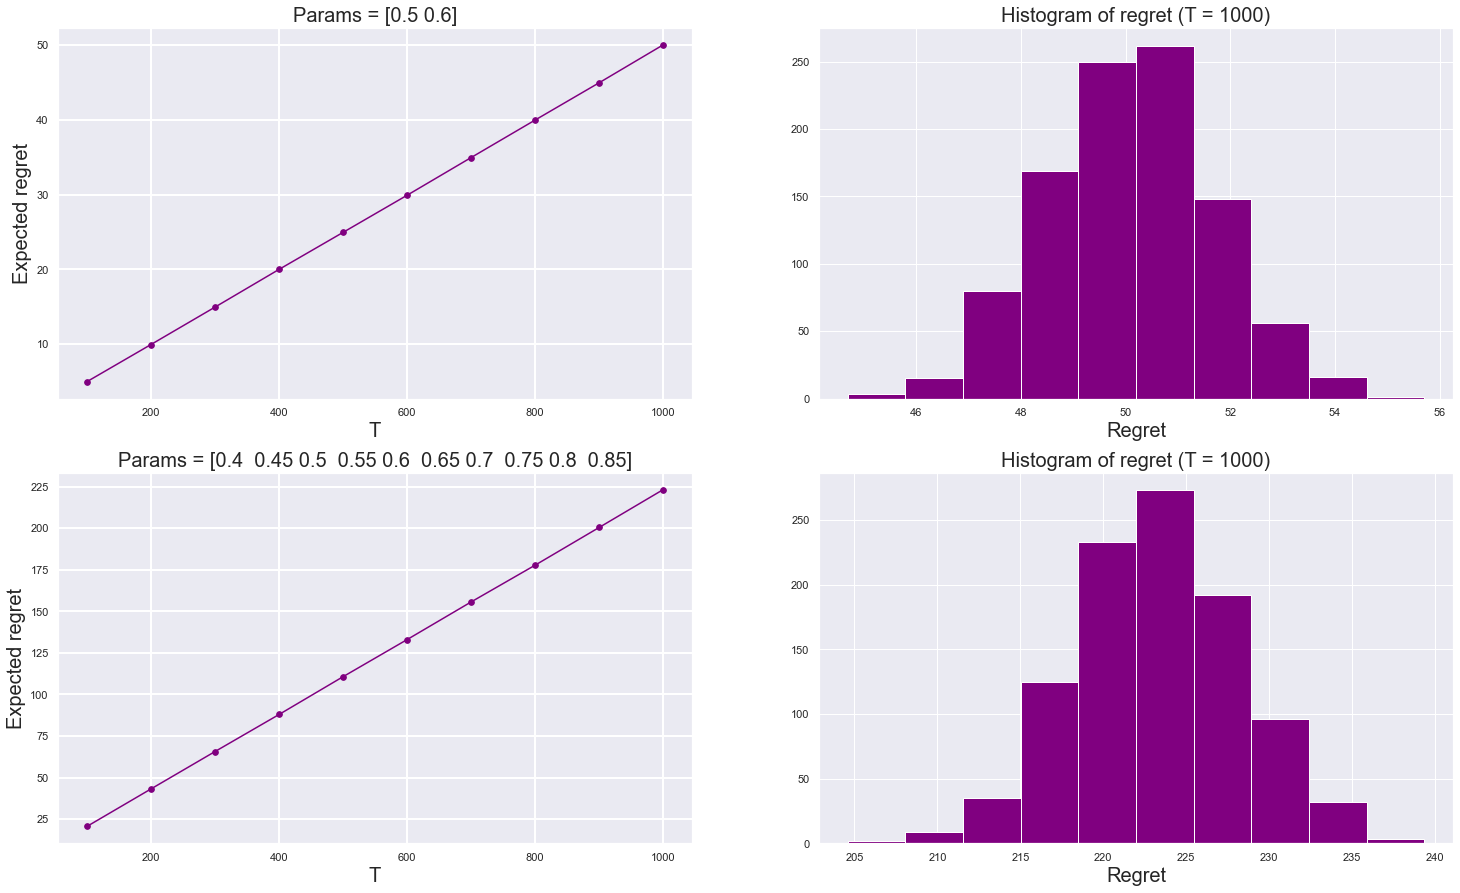

In [118]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

**Задание 4**

Реализуйте алгоритм Explore-First

In [10]:
def ExploreFirst(bandit, T, k):
    if T < bandit.K():
        raise Exception("T must be greater than number of arms K.")
        
    n = bandit.K()
    sum_rewards = np.zeros(n)
    regret = np.sum(bandit.regret(np.arange(n))) * k
    for t in range(k):
        sum_rewards += bandit.pull(np.arange(n))
        
    n_terms = np.ones(n) * k
    mean_rewards = sum_rewards / n_terms
    
    mask = mean_rewards == np.max(mean_rewards)
    arm = np.random.choice(np.arange(n)[mask])
    for t in range(T - n * k):
        mean_rewards[arm] = (mean_rewards[arm] * n_terms[arm] + bandit.pull(arm)) / (n_terms[arm] + 1)
        n_terms[arm] += 1
            
        regret += bandit.regret(arm)
        
    return regret
    
def simulate_ExploreFirst(params, time_range, k):
    mean_regret = []
    bandit = BernoulliBandit(params)
    pbar = tqdm(time_range)
    for t in pbar:
        pbar.set_description("Processing T = %s" % t)
        regret = []
        for i in range(1, 1000 + 1):
            regret.append(ExploreFirst(bandit, T=t, k=k))

        mean_regret.append(np.mean(regret))
        
    return np.array(mean_regret), regret

If $k = 10.$

In [124]:
time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_ExploreFirst(params1, time_range, k=10)
mean_regret2, regret2 = simulate_ExploreFirst(params2, time_range, k=10)

Processing T = 1000: 100%|██████████| 10/10 [00:55<00:00,  5.51s/it]


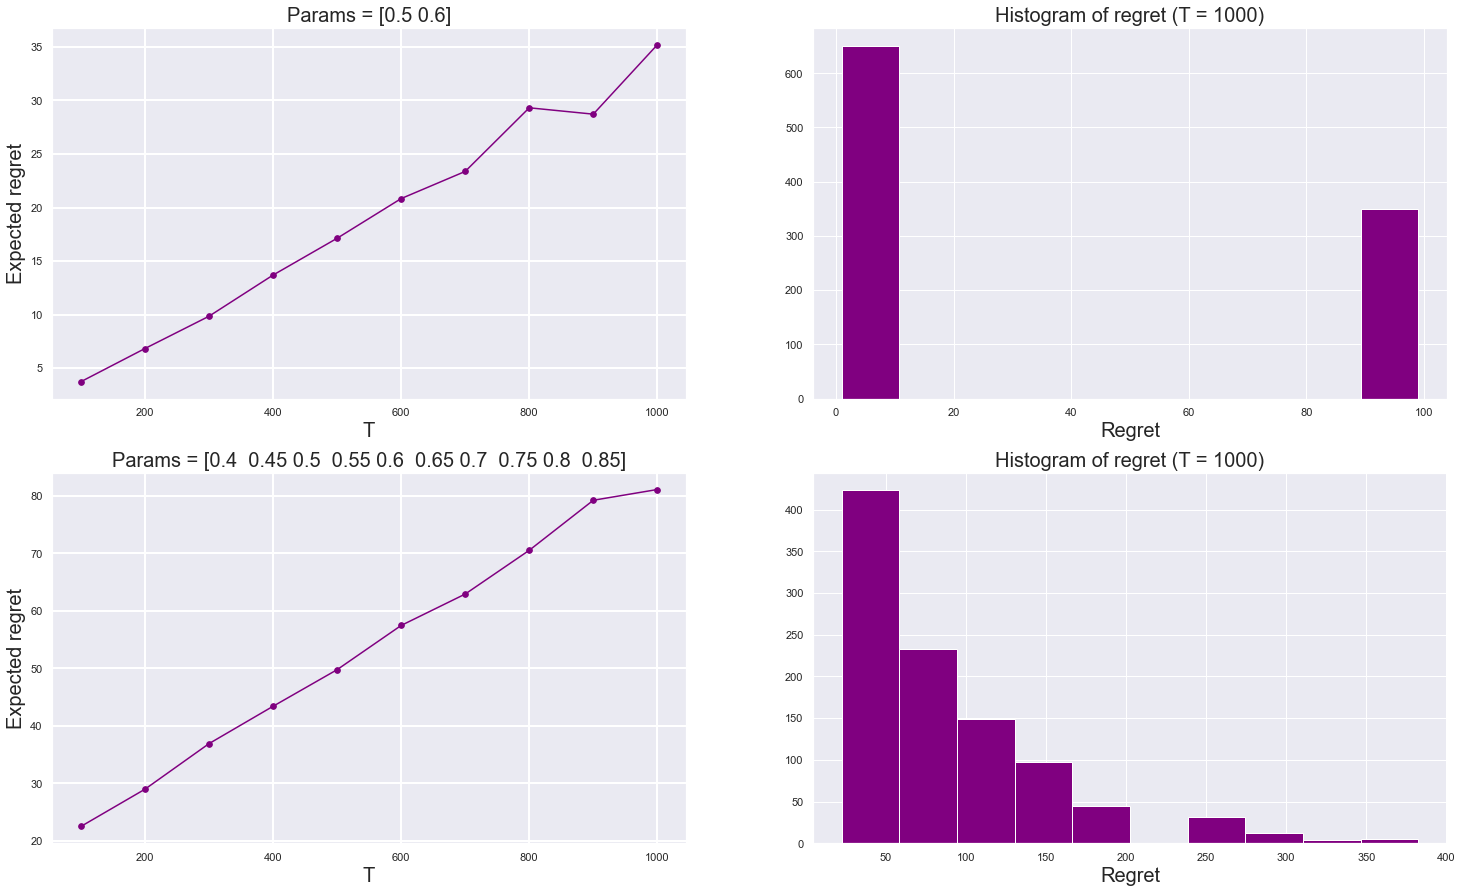

In [126]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

If $k = 50.$

In [128]:
time_range = range(500, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_ExploreFirst(params1, time_range, k=50)
mean_regret2, regret2 = simulate_ExploreFirst(params2, time_range, k=50)

Processing T = 1000: 100%|██████████| 6/6 [00:20<00:00,  3.36s/it]


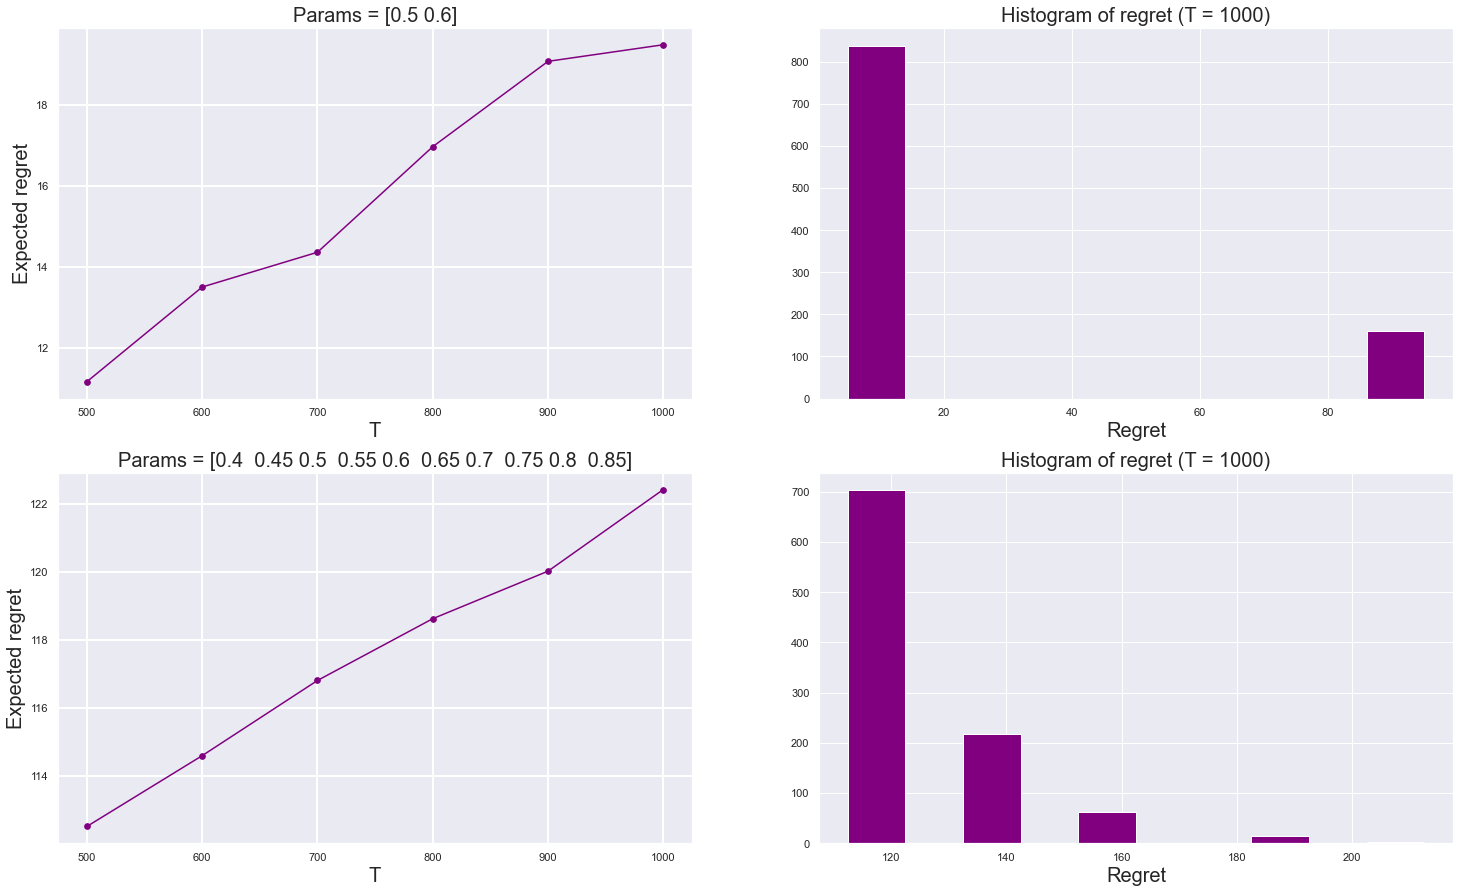

In [129]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

**Задание 5**

Реализуйте алгоритм $\varepsilon$-Greedy

In [11]:
def EGreedy(bandit, T, e=None):
    if T < bandit.K():
        raise Exception("T must be greater than number of arms K.")
        
    n = bandit.K()
    mean_rewards = np.zeros(n)
    n_terms = np.zeros(n)
    regret = 0
    
    arms = np.arange(n)
    for t in range(1, T + 1):
        if e is None:
            eps = t**(-1/3)
        else:
            eps = e
        
        if np.random.rand() < eps:
            arm = np.random.randint(n)
        else:
            mask = mean_rewards == np.max(mean_rewards)
            arm = np.random.choice(arms[mask])
        
        if n_terms[arm] == 0:
            mean_rewards[arm] = bandit.pull(arm)
        else:
            mean_rewards[arm] = (mean_rewards[arm] * n_terms[arm] + bandit.pull(arm)) / (n_terms[arm] + 1)
        n_terms[arm] += 1
            
        regret += bandit.regret(arm)
        
    return regret
    
def simulate_EGreedy(params, time_range, e=None):
    mean_regret = []
    bandit = BernoulliBandit(params)
    pbar = tqdm(time_range)
    for t in pbar:
        pbar.set_description("Processing T = %s" % t)
        regret = []
        for i in range(1, 1000 + 1):
            regret.append(EGreedy(bandit, T=t, e=e))

        mean_regret.append(np.mean(regret))
        
    return np.array(mean_regret), regret

If $\varepsilon_t = t^{-1/3}.$

In [140]:
time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_EGreedy(params1, time_range, e=None)
mean_regret2, regret2 = simulate_EGreedy(params2, time_range, e=None)

Processing T = 1000: 100%|██████████| 10/10 [02:24<00:00, 14.46s/it]


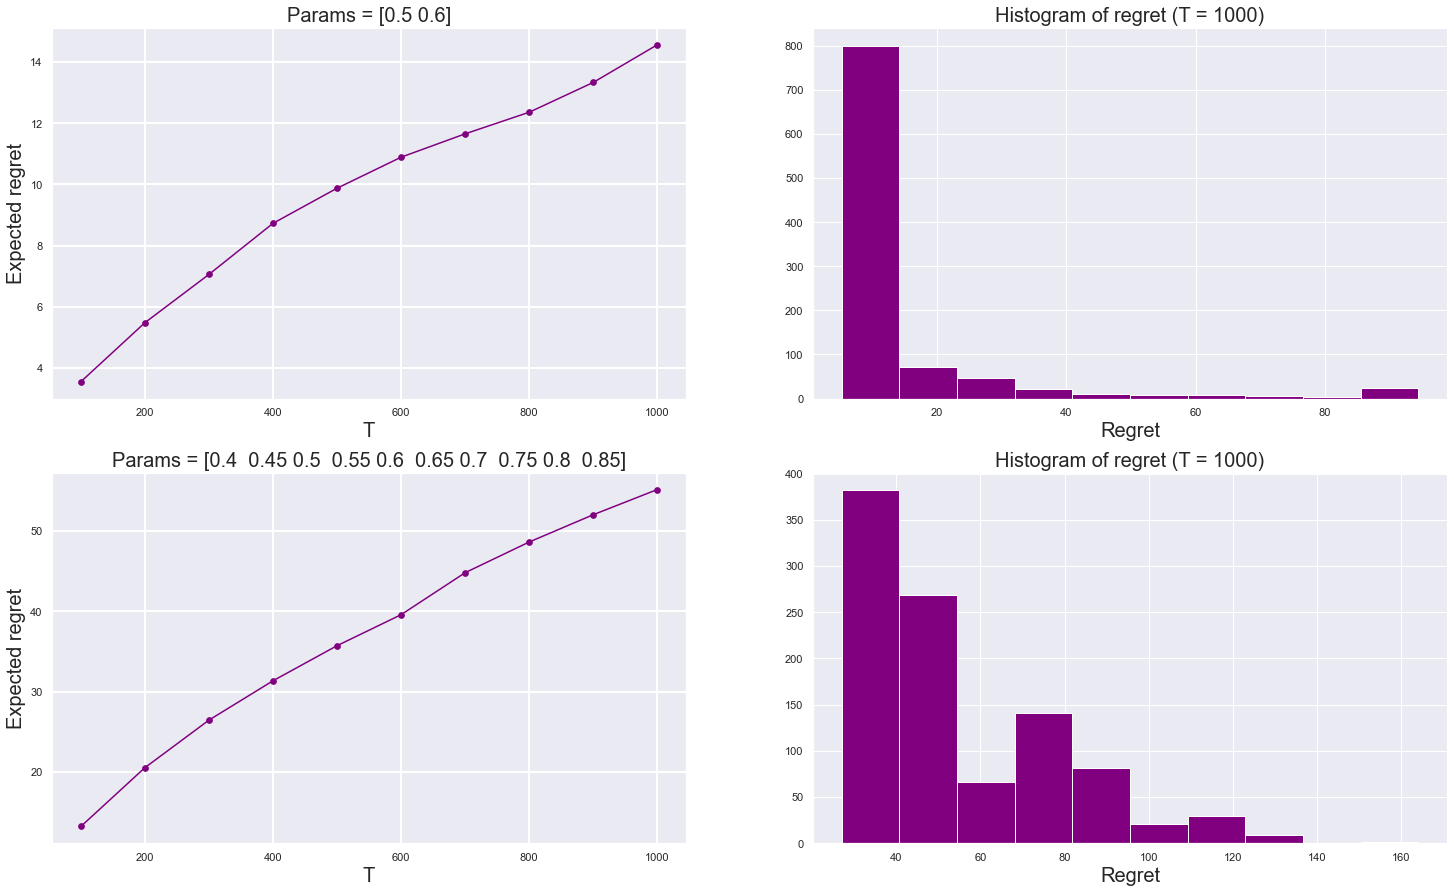

In [141]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

If $\varepsilon_t = 0.9.$

In [142]:
time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_EGreedy(params1, time_range, e=0.9)
mean_regret2, regret2 = simulate_EGreedy(params2, time_range, e=0.9)

Processing T = 1000: 100%|██████████| 10/10 [01:43<00:00, 10.31s/it]


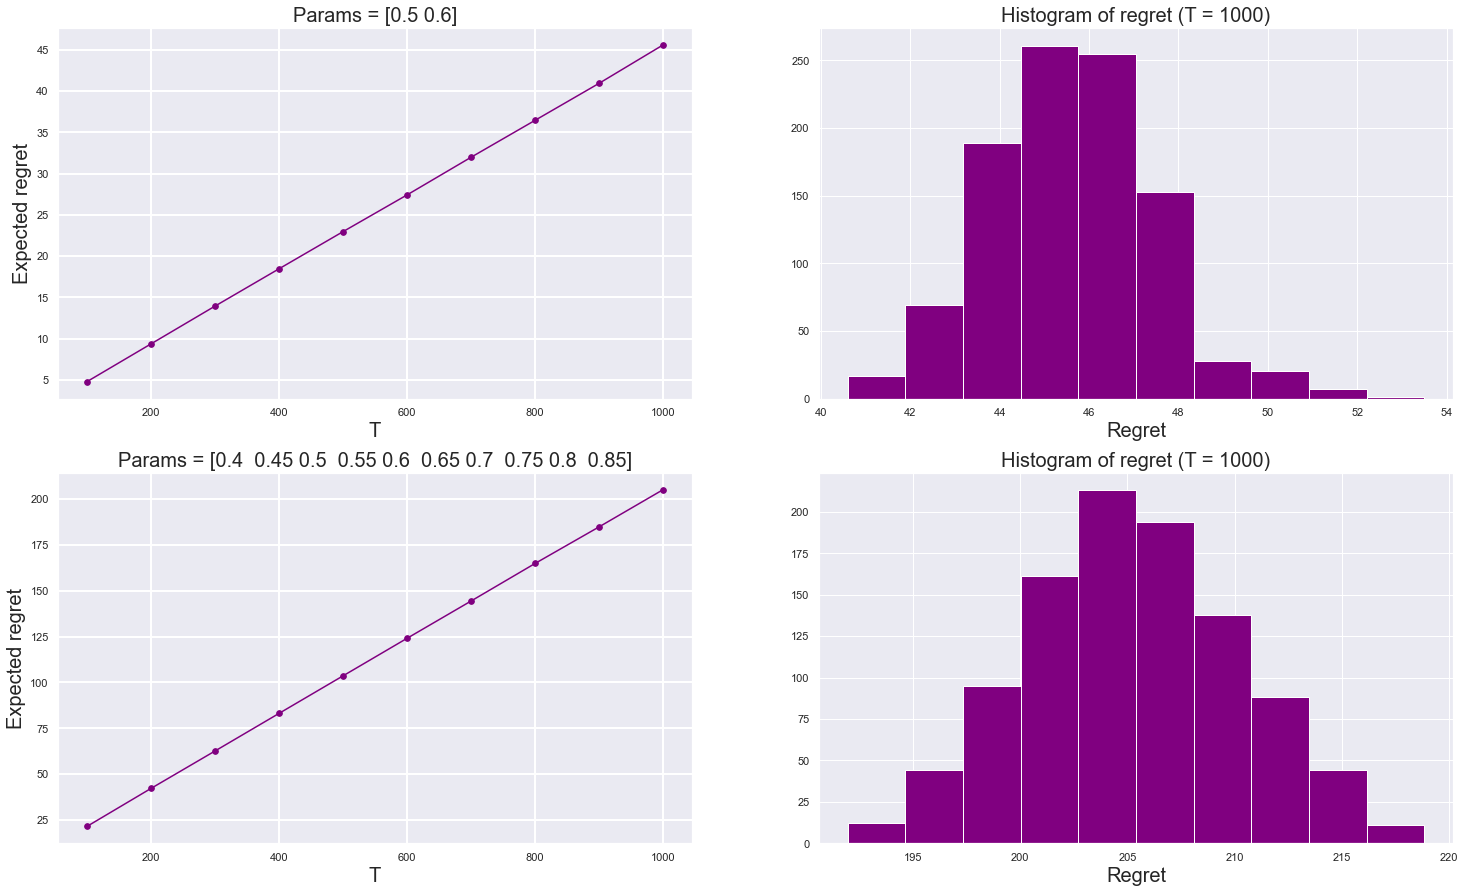

In [143]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

If $\varepsilon = 0.1.$

In [144]:
time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_EGreedy(params1, time_range, e=0.1)
mean_regret2, regret2 = simulate_EGreedy(params2, time_range, e=0.1)

Processing T = 1000: 100%|██████████| 10/10 [02:25<00:00, 14.56s/it]


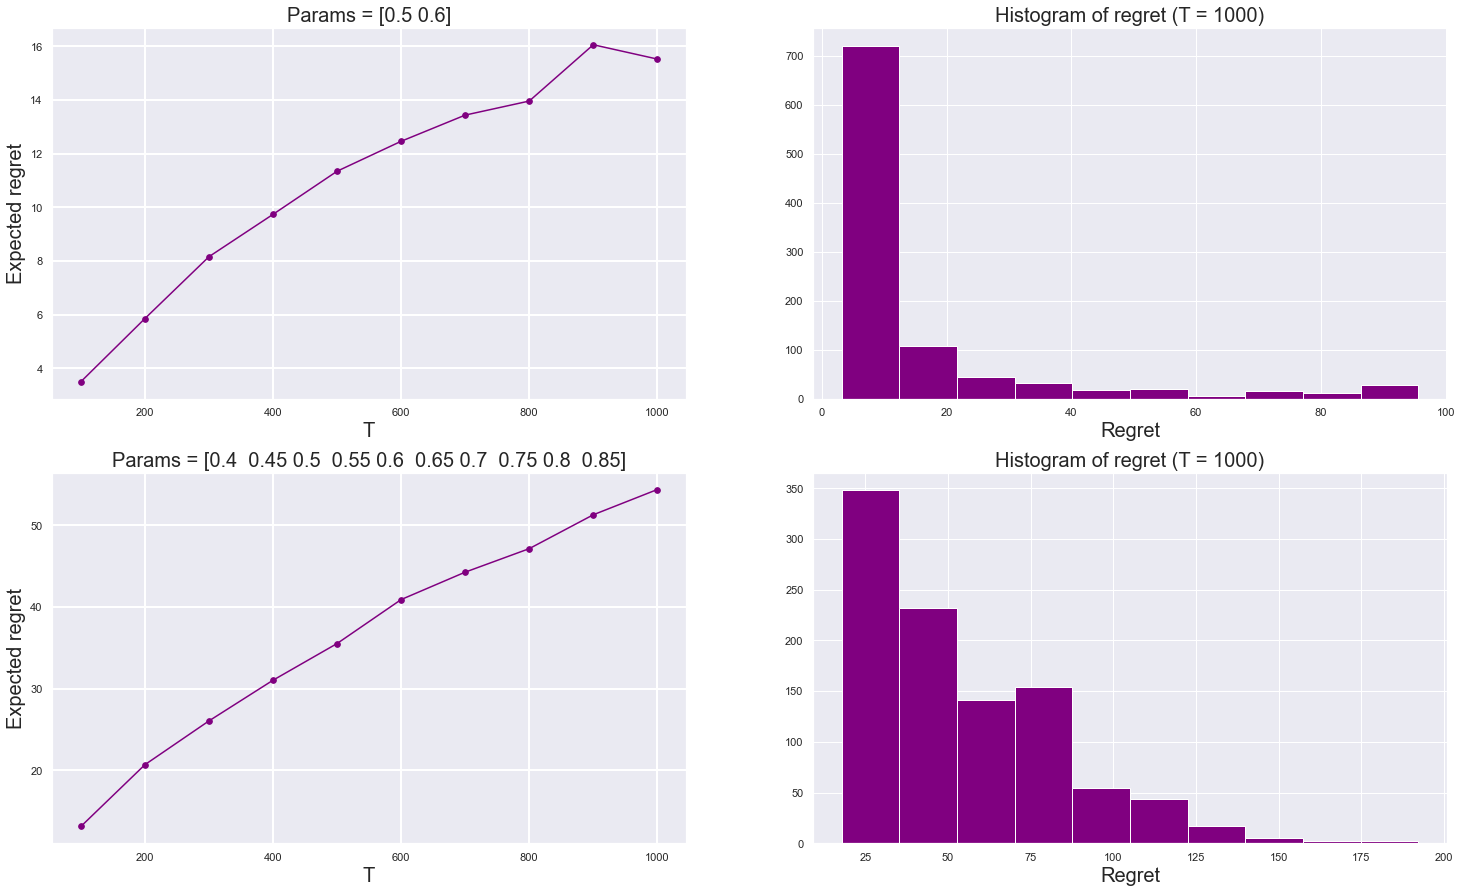

In [145]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

If $\varepsilon = 0.5.$

In [146]:
time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_EGreedy(params1, time_range, e=0.5)
mean_regret2, regret2 = simulate_EGreedy(params2, time_range, e=0.5)

Processing T = 1000: 100%|██████████| 10/10 [02:04<00:00, 12.42s/it]


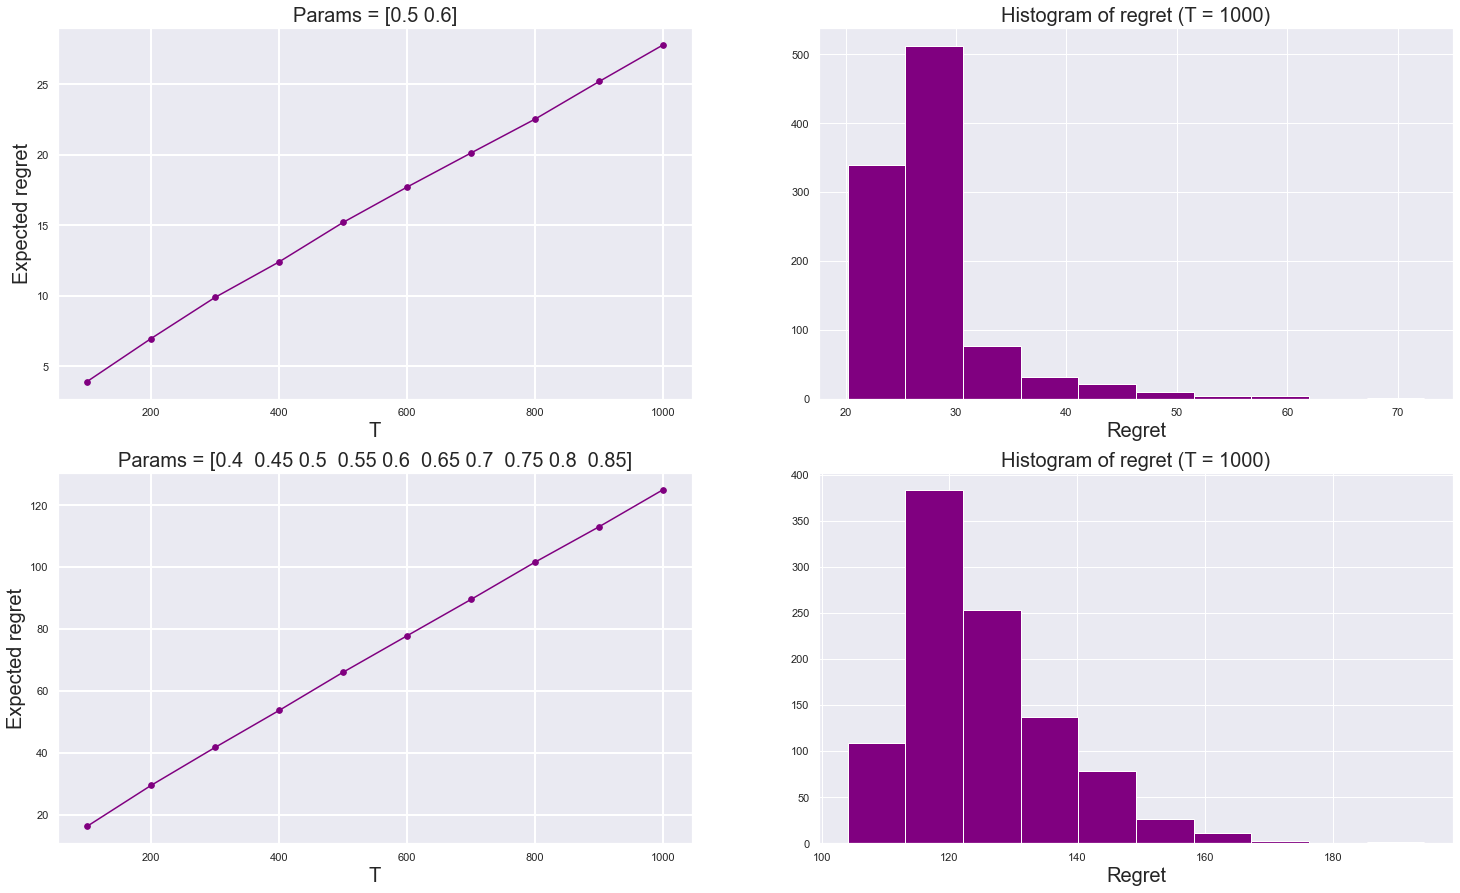

In [147]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

**Задание 6**

Реализуйте алгоритм Successive Elimination

In [12]:
def SuccessiveElimination(bandit, T):
    if T < bandit.K():
        raise Exception("T must be greater than number of arms K.")
    
    n = bandit.K()
    active_set = set(range(n))
    mean_rewards = np.zeros(n)
    n_terms = np.zeros(n)
    regret = 0
    
    t = 0
    while t < T:
        if not active_set:
            return regret
        
        for arm in active_set:
            if n_terms[arm] == 0:
                mean_rewards[arm] = bandit.pull(arm)
            else:
                mean_rewards[arm] = (mean_rewards[arm] * n_terms[arm] + bandit.pull(arm)) / (n_terms[arm] + 1)
            
            regret += bandit.regret(arm)
            n_terms[arm] += 1
            t += 1
            if t >= T:
                return regret
            
        new_active_set = active_set.copy()
        LCB = mean_rewards - np.sqrt(2 * np.log(T) / n_terms)
        for arm in active_set:
            UCB = mean_rewards[arm] + np.sqrt(2 * np.log(T) / n_terms[arm])
            mask = UCB < LCB
            if any(mask):
                new_active_set.remove(arm)

        active_set = new_active_set

    return regret
    
def simulate_SuccessiveElimination(params, time_range):
    mean_regret = []
    bandit = BernoulliBandit(params)
    pbar = tqdm(time_range)
    for t in pbar:
        pbar.set_description("Processing T = %s" % t)
        regret = []
        for i in range(1, 1000 + 1):
            regret.append(SuccessiveElimination(bandit, T=t))

        mean_regret.append(np.mean(regret))
        
    return np.array(mean_regret), regret

In [8]:
time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_SuccessiveElimination(params1, time_range)
mean_regret2, regret2 = simulate_SuccessiveElimination(params2, time_range)

Processing T = 1000: 100%|██████████| 10/10 [01:43<00:00, 10.32s/it]


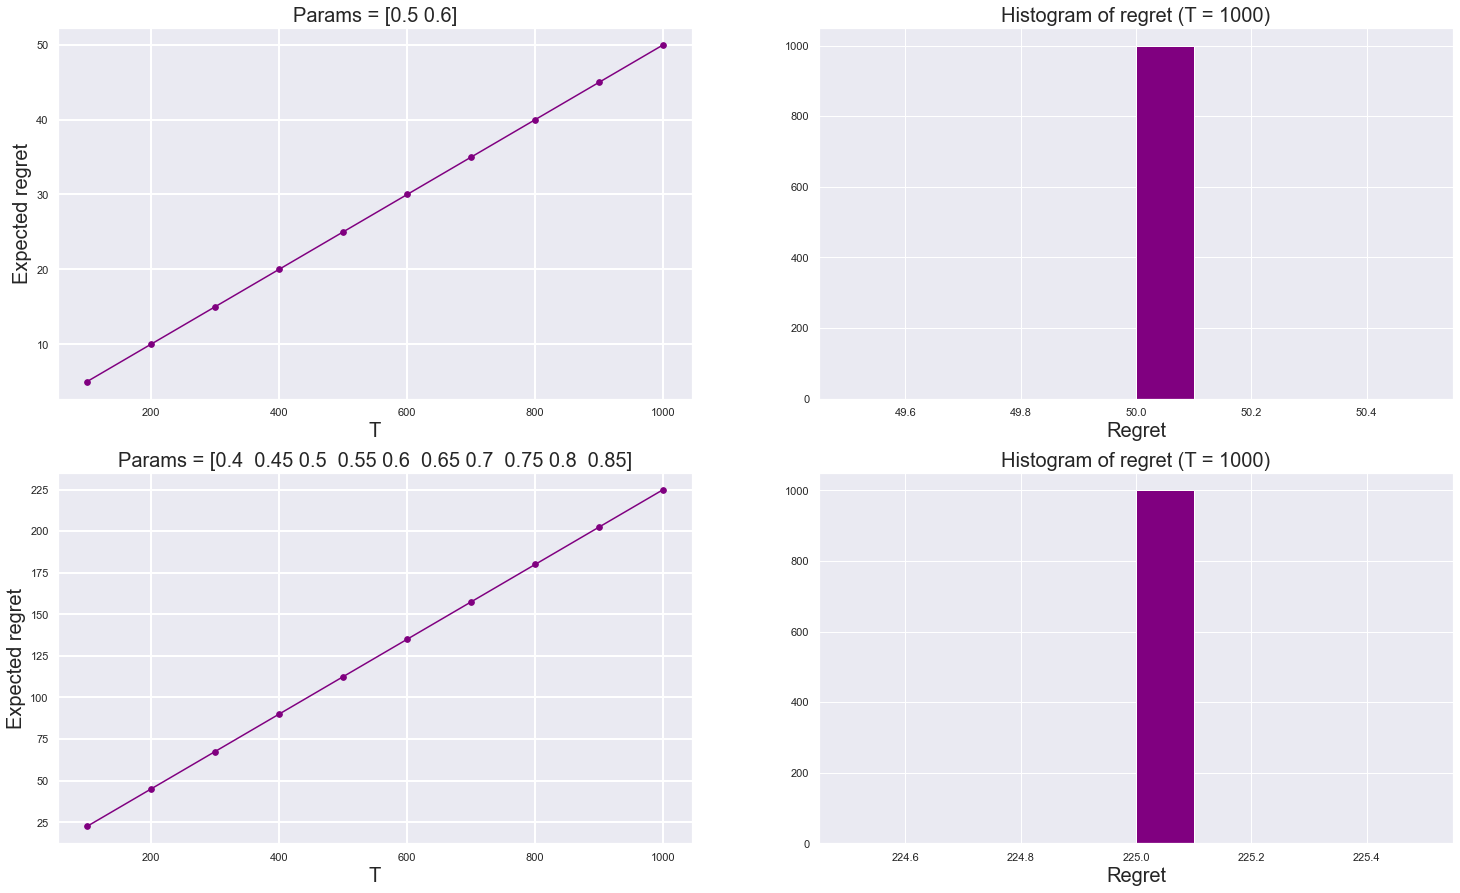

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

**Задание 7**

Реализуйте алгоритм UCB1

In [13]:
def UCB1(bandit, T):
    if T < bandit.K():
        raise Exception("T must be greater than number of arms K.")
    
    n = bandit.K()
    active_set = set(range(n))
    n_terms = np.ones(n)
    regret = 0
    
    mean_rewards = bandit.pull(np.arange(n))
    regret = np.sum(bandit.regret(np.arange(n)))
     
    arms = np.arange(n)
    for t in range(n, T):
        UCB = mean_rewards + np.sqrt(2 * np.log(T) / n_terms)
        mask = UCB == np.max(UCB)
        arm = np.random.choice(arms[mask])
        
        mean_rewards[arm] = (mean_rewards[arm] * n_terms[arm] + bandit.pull(arm)) / (n_terms[arm] + 1)
        n_terms[arm] += 1    
        regret += bandit.regret(arm)

    return regret
    
def simulate_UCB1(params, time_range):
    mean_regret = []
    bandit = BernoulliBandit(params)
    pbar = tqdm(time_range)
    for t in pbar:
        pbar.set_description("Processing T = %s" % t)
        regret = []
        for i in range(1, 1000 + 1):
            regret.append(UCB1(bandit, T=t))

        mean_regret.append(np.mean(regret))
        
    return np.array(mean_regret), regret

In [150]:
time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))
mean_regret1, regret1 = simulate_UCB1(params1, time_range)
mean_regret2, regret2 = simulate_UCB1(params2, time_range)

Processing T = 1000: 100%|██████████| 10/10 [03:06<00:00, 18.62s/it]


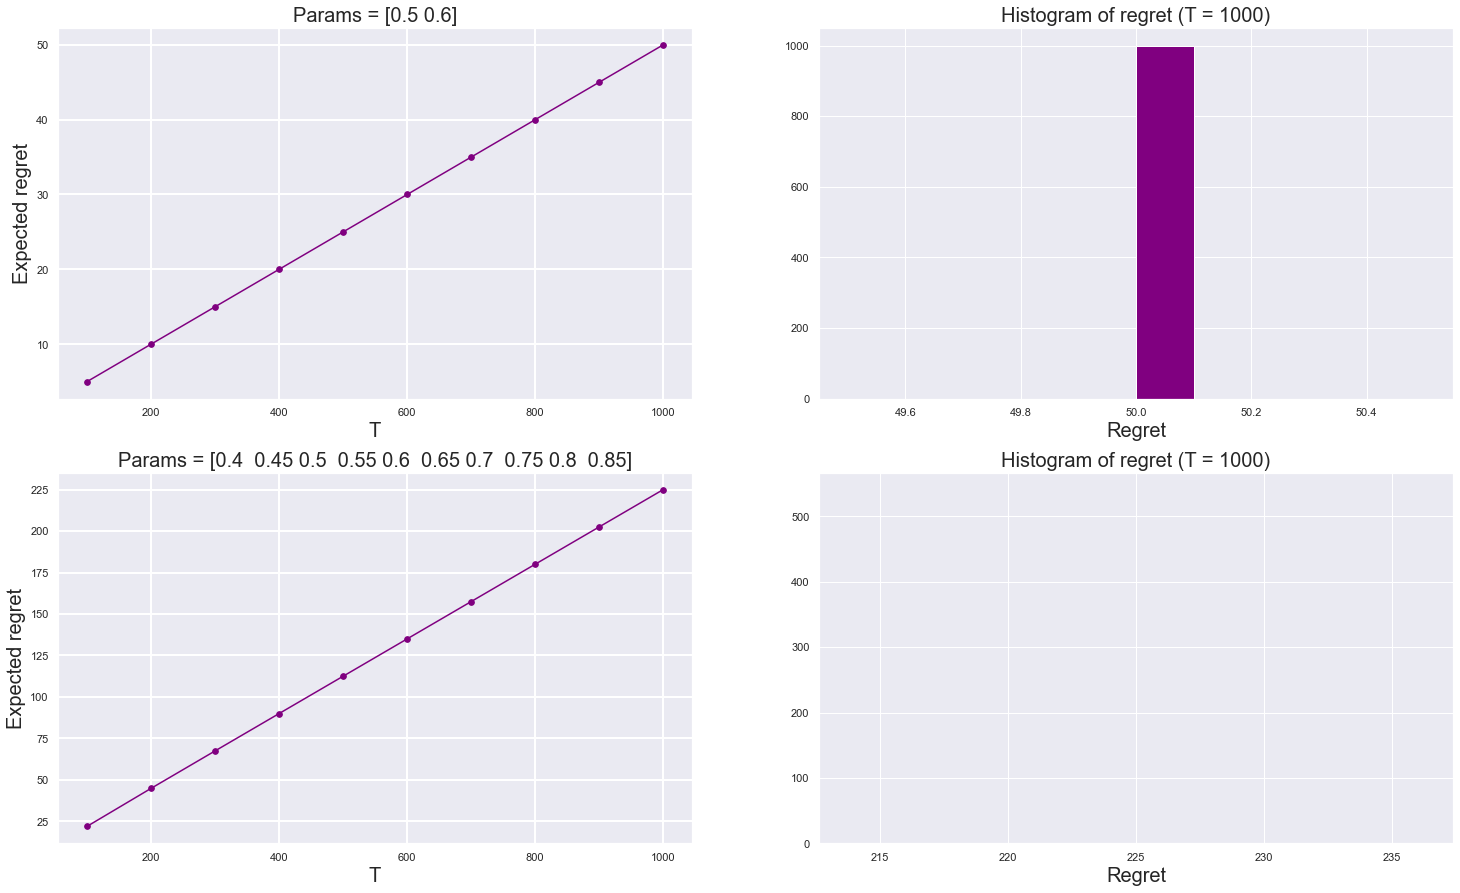

In [151]:
fig, ax = plt.subplots(2, 2, figsize=(25, 15))
plot_results(mean_regret1, mean_regret2, params1, params2, regret1, regret2, time_range, ax)

The bottom graph is not empty. All distribution is concentrated in the point 225.

Протестируйте алгоритмы, реализованные выше для бандита из класса бернулли (задание 2):


1.   2 ручки ($\mu_1=0.5$, $\mu_2=0.6$), $T \in \{100, 200, \dots, 1000\}$,  Проведите 1000 симуляций.
2.   10 ручек $(\mu_1 = 0.4, \dots, \mu_{10}=0.85)$, $T \in \{100, 200, \dots, 1000\}$,  Проведите 1000 симуляций.
3.   Постройте график среднего регрета как функцию от $T$. Объясните полученный график. Оцените качество алгоритмов.



In [29]:
algo = dict()
algo["FollowTheLeader"] = simulate_FollowTheLeader
algo["ExploreFirst"] = simulate_ExploreFirst
algo["EGreedy"] = simulate_EGreedy
algo["SuccessiveElimination"] = simulate_SuccessiveElimination
algo["USB1"] = simulate_UCB1

time_range = range(100, 1100, 100)
params1 = [0.5, 0.6]
params2 = list(np.arange(0.4, 0.9, 0.05))

res1 = dict()
for algo_name in algo.keys():
    for params in [params1]:
        if algo_name == "EGreedy":
            for e in [None, 0.1, 0.5, 0.9]:
                if e is None:
                    res1[algo_name+"_{}".format(None)] = algo[algo_name](params, time_range, e=e)
                else:
                    res1[algo_name+"_{}".format(round(e, 2))] = algo[algo_name](params, time_range, e=e)
        elif algo_name == "ExploreFirst":
            for k in [10, 50]:
                res1[algo_name+"_{}".format(round(k, 2))] = algo[algo_name](params, time_range, k=k)
        else:
            res1[algo_name] = algo[algo_name](params, time_range)

In [30]:
res2 = dict()
for algo_name in algo.keys():
    for params in [params2]:
        if algo_name == "EGreedy":
            for e in [None, 0.1, 0.5, 0.9]:
                if e is None:
                    res2[algo_name+"_{}".format(None)] = algo[algo_name](params, time_range, e=e)
                else:
                    res2[algo_name+"_{}".format(round(e, 2))] = algo[algo_name](params, time_range, e=e)
        elif algo_name == "ExploreFirst":
            for k in [10, 50]:
                res2[algo_name+"_{}".format(round(k, 2))] = algo[algo_name](params, time_range, k=k)
        else:
            res2[algo_name] = algo[algo_name](params, time_range)

Processing T = 1000: 100%|██████████| 10/10 [03:17<00:00, 19.73s/it]


Text(0.5, 1.0, 'Params = [0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85]')

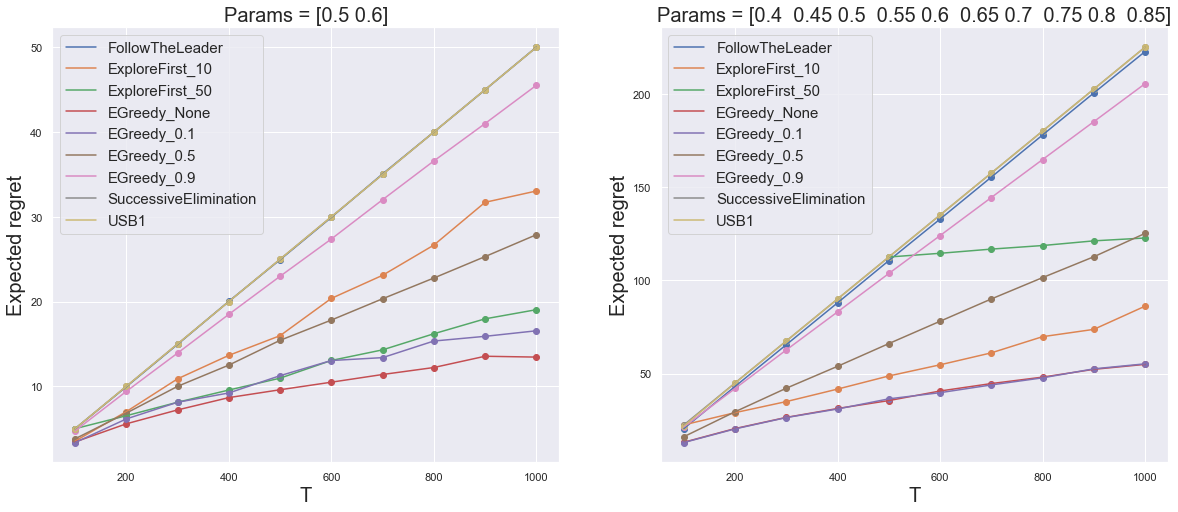

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

for name in res1.keys():
    ax[0].plot(time_range, res1[name][0], label=name)
    ax[0].scatter(time_range, res1[name][0])
    if name == "ExploreFirst_50":
        ax[1].plot(time_range[4:], res2[name][0][4:], label=name)
        ax[1].scatter(time_range[4:], res2[name][0][4:])
    else:
        ax[1].plot(time_range, res2[name][0], label=name)
        ax[1].scatter(time_range, res2[name][0])
    
ax[0].legend(fontsize=15)
ax[0].set_xlabel("T", fontsize=20)
ax[0].set_ylabel("Expected regret", fontsize=20)
ax[0].set_title("Params = {}".format(np.round(params1, 3)), fontsize=20)
    
ax[1].legend(fontsize=15)
ax[1].set_xlabel("T", fontsize=20)
ax[1].set_ylabel("Expected regret", fontsize=20)
ax[1].set_title("Params = {}".format(np.round(params2, 3)), fontsize=20)

In [121]:
aa, a = simulate_ExploreFirst(params2, np.arange(500, 2100, 100), k=50)

Processing T = 2000: 100%|██████████| 16/16 [02:29<00:00,  9.35s/it]


Text(0.5, 1.0, 'Params = [0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85]')

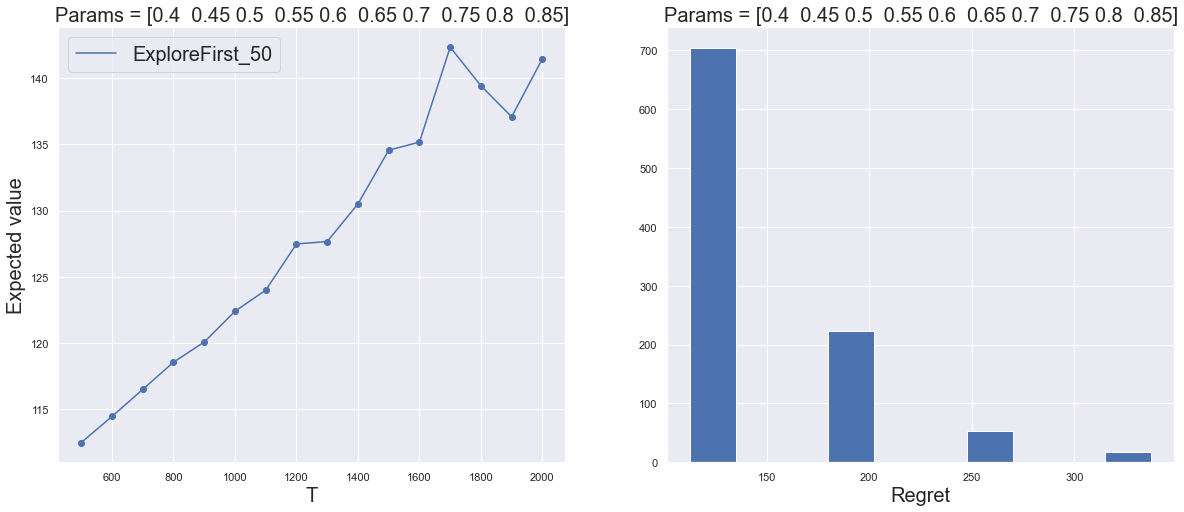

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(np.arange(500, 2100, 100), aa, label="ExploreFirst_50")
ax[0].scatter(np.arange(500, 2100, 100), aa)
ax[0].set_xlabel("T", fontsize=20)
ax[0].set_ylabel("Expected value", fontsize=20)
ax[0].legend(fontsize=20)
ax[0].set_title("Params = {}".format(np.round(params2, 3)), fontsize=20)

ax[1].hist(a)
ax[1].set_xlabel("Regret", fontsize=20)
ax[1].set_title("Params = {}".format(np.round(params2, 3)), fontsize=20)